In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\data\fashion-mnist_test.csv
input\data\fashion-mnist_train.csv
input\data\t10k-images-idx3-ubyte
input\data\t10k-labels-idx1-ubyte
input\data\train-images-idx3-ubyte
input\data\train-labels-idx1-ubyte


In [3]:
train_df = pd.read_csv('input\\data\\fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('input\\data\\fashion-mnist_test.csv', sep = ',')

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
img=train_df.iloc[0:1,1:]
img=np.array(img)
img=np.reshape(img,(28,28,1))
plt.imshow(img,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

NameError: name 'train_df' is not defined

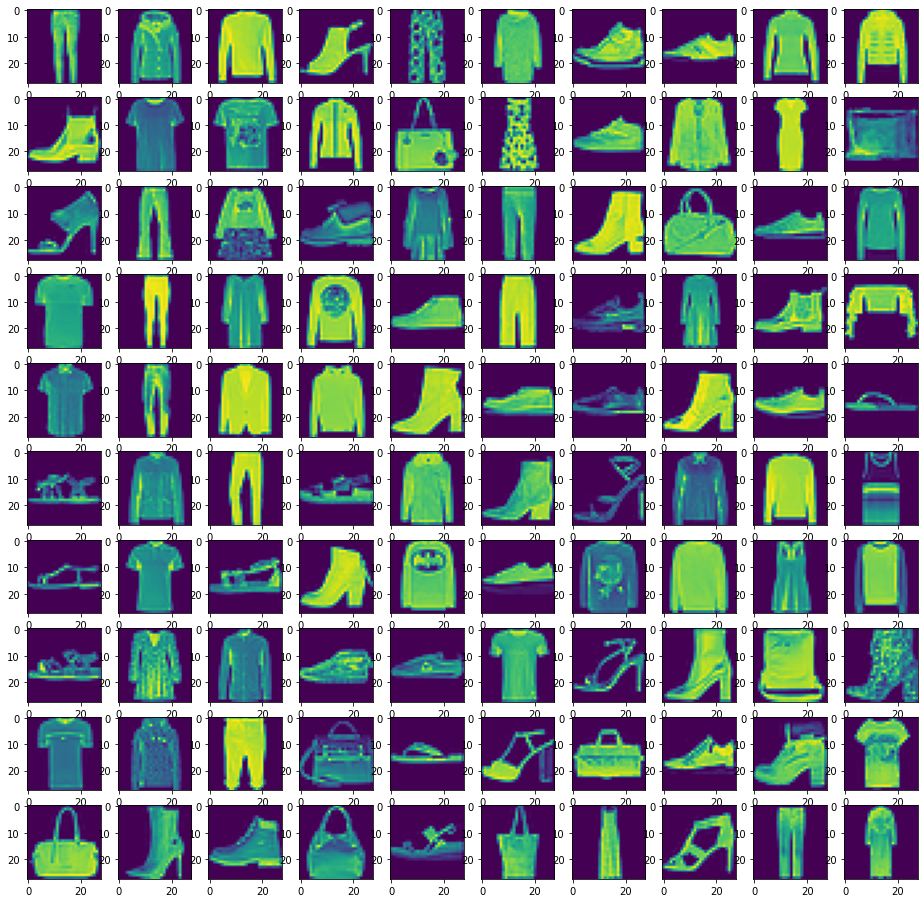

In [7]:
rows = 10
columns = 10
fig,ax = plt.subplots(rows,columns,figsize = (16,16))
ax = ax.ravel()
n_train = len(train_df)
for i in range(0,10*10):
    index = np.random.randint(0, n_train)
    img = train_df.iloc[index,1:]
    img = np.array(img)
    ax[i].imshow(img.reshape(28,28,1))

In [8]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [9]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [10]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [11]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [12]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [13]:
model = tf.keras.Sequential([
    layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2), strides=2),
     layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [15]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [16]:
history = model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=20,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/20
12/12 [==============================] - 32s 3s/step - loss: 1.5833 - accuracy: 0.4930 - val_loss: 0.8426 - val_accuracy: 0.6869
Epoch 2/20
12/12 [==============================] - 27s 2s/step - loss: 0.7407 - accuracy: 0.7296 - val_loss: 0.6516 - val_accuracy: 0.7712
Epoch 3/20
12/12 [==============================] - 27s 2s/step - loss: 0.6137 - accuracy: 0.7757 - val_loss: 0.5632 - val_accuracy: 0.7977
Epoch 4/20
12/12 [==============================] - 27s 2s/step - loss: 0.5382 - accuracy: 0.8063 - val_loss: 0.5121 - val_accuracy: 0.8200
Epoch 5/20
12/12 [==============================] - 26s 2s/step - loss: 0.4935 - accuracy: 0.8255 - val_loss: 0.4739 - val_accuracy: 0.8270
Epoch 6/20
12/12 [==============================] - 26s 2s/step - loss: 0.4624 - accuracy: 0.8361 - val_loss: 0.4448 - val_accuracy: 0.8412
Epoch 7/20
12/12 [==============================] - 26s 2s/step - loss: 0.4375 - accuracy: 0.8437 - val_loss: 0.4231 - val_accuracy: 0.8479
Epoch 8/20
12/12 [==

In [17]:
score = model.evaluate(x_test, y_test)
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.3197 - accuracy: 0.8874
Test loss: 0.31974419951438904
Test accuracy: 0.8873999714851379


In [18]:
labels = {
    0:"T-shirt/top",
1:"Trouser",
2:"Pullover",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Sneaker",
8:"Bag",
9:"Ankle boot"}


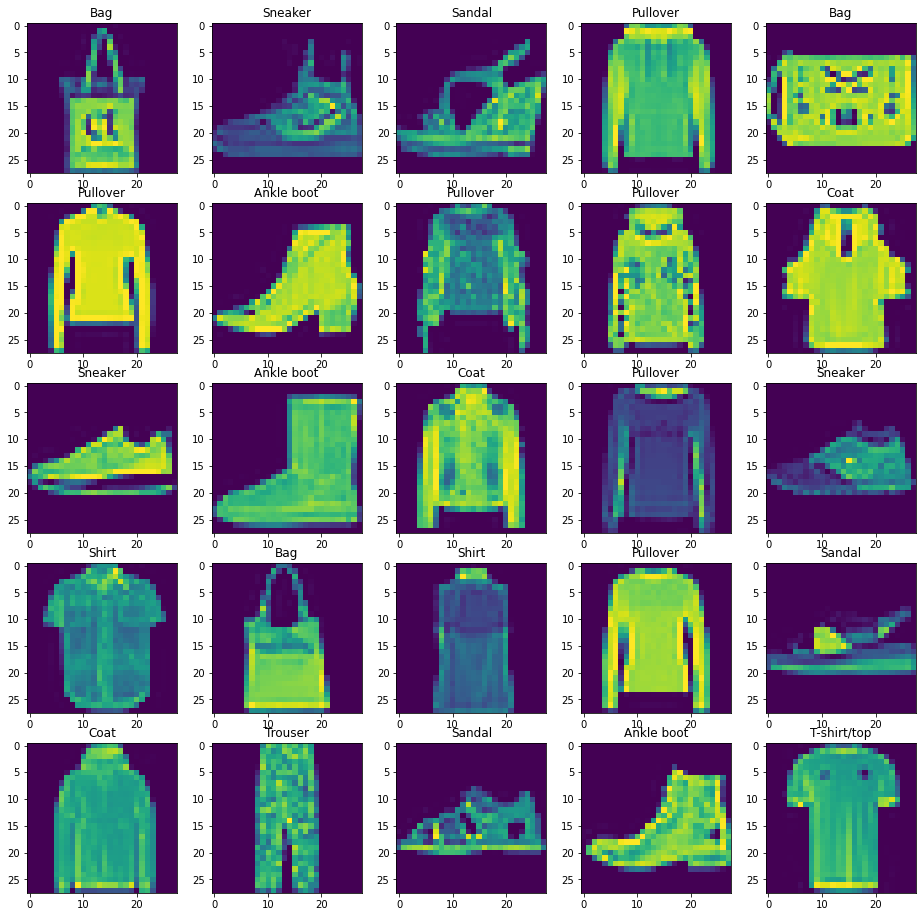

In [21]:
rows = 5
columns = 5
fig,ax = plt.subplots(rows,columns,figsize = (16,16))
ax = ax.ravel()
n_test = len(x_test)
pred = model.predict(x_test)

for i in range(0,5*5):
    index = np.random.randint(0, n_test)
    img = x_test[index]
    img = np.array(img)
    predofI = np.argmax(pred[index])
    ax[i].set_title(labels[predofI])
    ax[i].imshow(img.reshape(28,28,1))